#### 6.Isolation Forests

Source: https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. 
This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.
Then for prediction, it compares an observation against that splitting value in a “node”, that node will have two node children on which another random comparisons will be made. The number of “splittings” made by the algorithm for an instance is named: “path length”. As expected, outliers will have shorter path lengths than the rest of the observations.


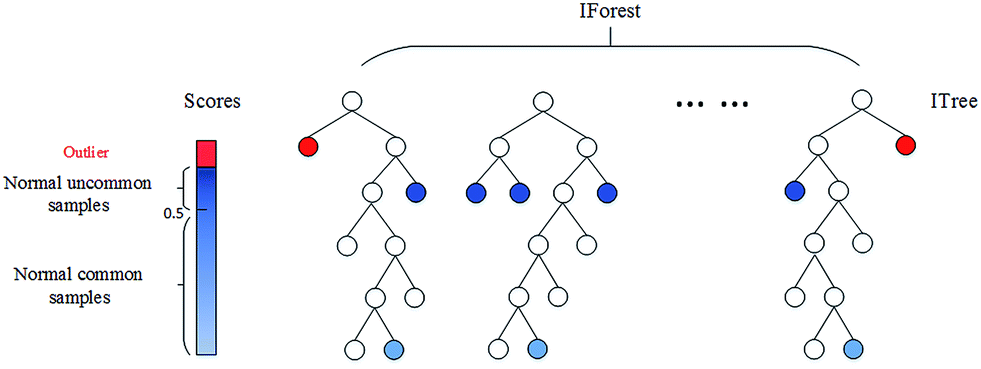

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

The most important hyperparameter in the Isolation Forest algorithm is the contamination hyperparameter — a value we don’t know. It represents the proportion of outliers in the dataset. The values of this hyperparameter are ranging from 0 to 0.5. If we believe that there will be many outliers in our data, we can set contamination to a larger value. Not knowing the exact proportion of outliers in the dataset is the major limitation of using this method.

An outlier score can computed for each observation:


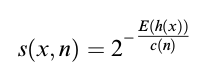

Where h(x) is the path length of the sample x, and c(n) is the ‘unsuccessful length search’ of a binary tree (the maximum path length of a binary tree from root to external node) n is the number of external nodes. After giving each observation a score ranging from 0 to 1; 1 meaning more outlyingness and 0 meaning more normality. A threshold can be specified (ie. 0.55 or 0.60).

**Isolation Forest pros:**
There is no need of scaling the values in the feature space.
It is an effective method when value distributions can not be assumed.
It has few parameters, this makes this method fairly robust and easy to optimize.
Scikit-Learn’s implementation is easy to use and the documentation is superb.

**Isolation Forest cons:**
The Python implementation exists only in the development version of Sklearn.
Visualizing results is complicated.
If not correctly optimized, training time can be very long and computationally expensive.

#### 7. Probabilistic and Statistical Modeling (parametric)

Sources: https://link.springer.com/chapter/10.1007/978-1-4614-6396-2_2?noAccess=true

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755


**commonly used in statistics for the detection of univariate outliers:**

** a)Tukey’s box plot method**

Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.


![Tukey.png](attachment:Tukey.png)

Example of a box plot including the inner and outer fences and minimum and maximum observations (known as whiskers). 

Image by Stephanie Glen on statisticsHowTo.com


IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile

Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]

Outer fence = [Q1–3*IQR, Q3+3*IQR]

The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. 

The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. 

Following Tukey, only the probable outliers are treated, which lie outside the outer fence

**Advantages of Tukey's method**
The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. 

Also, the statistics are easy to calculate. 

Furthermore, this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings. If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

**b) Median Absolute Deviation method**

The median absolute deviation method (MAD) replaces the mean and standard deviation with more robust statistics, like the median and median absolute deviation. The median absolute deviation is defined as:


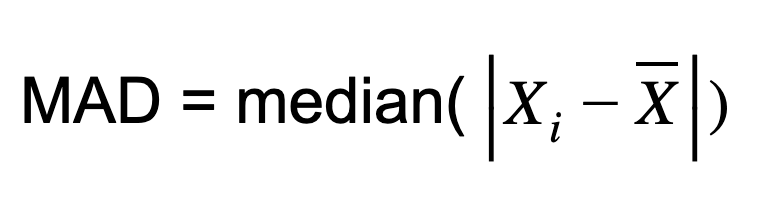


The test statistic is calculated like the z-score using robust statistics. Also, to identify outlying observations, the cut-off point of 3 is used. If the test statistic lies above 3, it is marked as an outlier. Compared z-score, this method is more robust to outliers and does assume X to be parametrically distributed (Examples of discrete and continuous parametric distributions).


#### 8. Outlier Detection by Simple Statistics with ECOD

Source: https://medium.com/geekculture/replace-outlier-detection-by-simple-statistics-with-ecod-f95a7d982f79

A new and better alternative is ECOD, an abbreviation of “empirical cumulative distribution functions for outlier detection”. The paper was published in 2021.

It has several key features that make it stand out from competing algorithms:

No hyperparameters! This is important because is difficult to tune hyperparameters for outlier detection because the true labels are rare, unknown, or difficult to obtain.

Fast and computationally efficient. The time complexity scales linearly with dataset size and number of dimensions.

Easy to understand and interpretable.


This article contains two sections:
    
A Description of ECOD algorithm works: introduction, intuition, and the algorithm itself. Further, I propose how a 
practitioner or domain expert might hand-select thresholds for a particular application.

A tutorial of how to use ECOD in python.

##### The ECOD Algorithm

*ECOD uses information about the distribution of the data to determine where data is less likely (low-density) and thus more outlierly*. 

Specifically, ECOD estimates a empirical cumulative distribution function (ECDF) for each variable the data separately. To generate an outlier score for an observation, ECOD computes the tail probability for each variable using the univariate ECDFs and multiplies them together. This calculation is done in log space, accounting for both left and right tails of each dimension.




The empirical cumulative distribution function is an estimate of the underlying cumulative distribution function (CDF) that generated the points in the sample. The CDF of a random variable is the probability that a variable will take a value less than or equal to X (Wikipedia). Image source: Wikimedia

#### ECOD Intuition
As an intuitive starting point, if you built a histogram of the data, capturing information about the distribution of the data, then you could use bins with low counts to determine where outliers are. 
The plots below illustrate this idea.

![ECOD-2.png](attachment:ECOD-2.png)



Four randomly generated distributions. Three of the samples have bins with low counts. Points falling into these bins could be considered outliers.


Unfortunately, this approach using histograms to identify outlying points includes hyperparameters that must be selected: how to bin the data for histogram construction.

Here is the general idea: outliers are points that occur in low density parts of the probability distribution. If the distribution is unimodal (aka has only one peak), then the rare items are located in the tails of the distribution. (Two of the distributions above are unimodal).

ECOD makes this concept concrete. For each observation, ECOD scores outliers according to the probability of observing a point at least as “extreme” as the given observation, in terms of tail probabilitie.

##### Fitting ECOD
The algorithm to fit ECOD is quite simple. For each variable in the training dataset:

Estimate the left tail univariate ECDF for the variable

Estimate the right tail univariate ECDF for the variable

Compute sample skewness coefficient for the variable's distribution

Because the fit is a for-loop, it can be parallelized for faster fitting. Remember that the ECDF functions are used to calculate the probability of a value appearing in the fitted distribution.

### 9. Machine learning techniques for outlier detection in Python

Source: https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d

https://towardsdatascience.com/two-outlier-detection-techniques-you-should-know-in-2021-1454bef89331

#### 9.A Elliptic Envelope Algorithm

The intuition behind the Elliptic Envelope is very simple. We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as an inlier (green ones) and any observation outside the ellipse as an outlier (red ones).

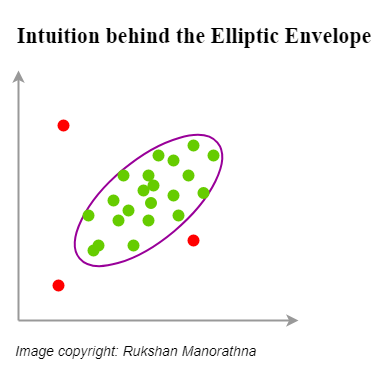
                                                Elliptic Envelope Algorithm
                                                
                                                
                                                


The Elliptic Envelope method considers all observations as a whole, not individual features. Although the intuition behind this method is very simple, the implementation is somewhat tricky. In Scikit-learn, the Elliptic Envelope method is implemented by EllipticEnvelope() function. There, we need to specify the contamination hyperparameter — a value we don’t know. It represents the proportion of outliers in the dataset. The values of this hyperparameter are ranging from 0 to 0.5 (default is 0.1). If we believe that there will be many outliers in our data, we can set contamination to a larger value. Not knowing the exact proportion of outliers in the dataset is the major limitation of using this method.

#### 9.B One-Class SVM Algorithm

One-class SVM (One-class Support Vector Machines) is an unsupervised machine learning algorithm that can be used for novelty detection. It is very sensitive to outliers. Therefore, it is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers. This algorithm can be applied to high-dimensional data sets and there is no underlying assumption in the distribution of the data.

#### Intuition
One-class SVM is based on SVM. An SVM uses a hyperplane to separate two classes while a One-class SVM uses a hypersphere to encompass all of the observations.
#### Implementation
Since One-class SVM is not very good for outlier detection, here we use it for novelty detection.


![SVM%20Novelty.png](attachment:SVM%20Novelty.png)